# Assignment 1
Submitted by Prakash R [ 17110109 ]

Using the "Tweets Dataset" to calculate Token, Types and TTR. Also plotted the Zipf's Law and Heap's Law for the given corpus. First we need to import some libraries into the notebook. For geting the number of meaning we used 'wordnet' function from the library nltk.

In [136]:
import pandas as pd 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import TweetTokenizer
import nltk
nltk.download('wordnet')
import numpy as np
import re
data = pd.read_csv("tweets-dataset.csv")
data.head()
tw=TweetTokenizer()

[nltk_data] Downloading package wordnet to /Users/prakash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Question 1

To tokenize first i converted the text to lower case and then removed the link, hashtag and mentions using regex. <br>
TTR = n(Tokens)/n(Types)

In [137]:
text=""
for i in range(data.shape[0]):
    text+=str(data.loc[i,"Sentence"])+" "
text=text.lower()
#Case Folding
print("Stats before processing the data :")
word=np.array(tw.tokenize(text))
print("Tokens:",len(word)) 
vocab, counts = np.unique(word, return_counts=True)
print("Types:",len(vocab))
print("TTR:",len(vocab)/len(word))

Stats before processing the data :
Tokens: 367775
Types: 42083
TTR: 0.114425939772959


In [138]:
#Pre-Processing
text=re.sub("\S+\.co\S+","",text)
text=re.sub("#\S+","",text)
text=re.sub("@\S+","",text)
text=re.sub("[^\w\s]","",text)
print("Stats after processing the data :")
word=np.array(tw.tokenize(text))
print("Tokens:",len(word)) 
vocab, counts = np.unique(word, return_counts=True)
freq=dict(zip(vocab, counts))
print("Types:",len(vocab))
print("TTR:",len(vocab)/len(word))

Stats after processing the data :
Tokens: 289111
Types: 32159
TTR: 0.11123409347966698


## Question 2

To check if the Zipf Law holds for meaning and length.

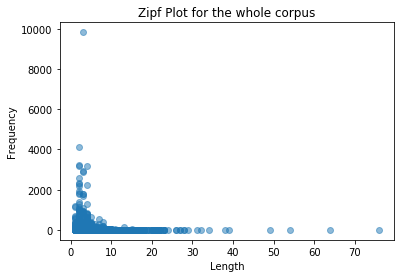

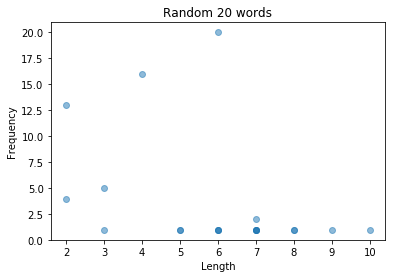

In [139]:
from nltk.corpus import wordnet
import operator
import random
sorted_x = sorted(freq.items(), key=operator.itemgetter(1),reverse=True)
# print(sorted_x)
len_=[]
freq_=[]
for val in freq:
    len_.append(len(val))
    freq_.append(freq[val])

# print(len_,freq_)
plt.scatter(len_,freq_, alpha=0.5)
plt.title('Zipf Plot for the whole corpus')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()
#Random
index=[random.randrange(0,len(freq)) for j in range(20)]
len1_=[]
freq1_=[]
for i in index:
    len1_.append(len_[i])
    freq1_.append(freq_[i])
plt.scatter(len1_,freq1_, alpha=0.5)
plt.title('Random 20 words')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

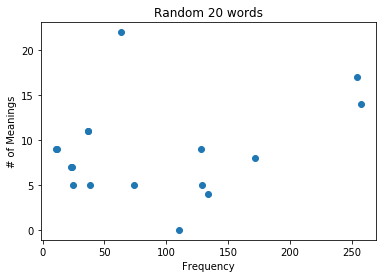

In [140]:
random_words=["please","when","only","start","talk","search","rock","now","more","some","talk","trend","up","out","idea","ticket","agree"]
x = [len(wordnet.synsets(val)) for val in random_words]
y = [freq[val] for val in random_words ]
plt.scatter(y,x)
plt.title('Random 20 words')
plt.xlabel('Frequency')
plt.ylabel('# of Meanings')
plt.show()

## Question 3

Plot Heap's Law

K = 14.623768254258355 Beta = 0.6126791722949311


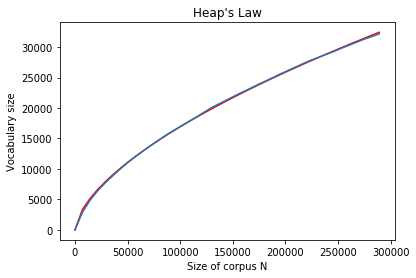

In [141]:
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
def func(n, k, beta):
    return k * np.power(n,beta)
x=[]
y=[]
for i in range(0,len(word),len(word)//40):
    x.append(len(word[:i])) 
    y.append(len(set(word[:i])))
popt, pcov = curve_fit(func, x, y)
print("K =",popt[0],"Beta =",popt[1])
plt.plot(x, func(x, *popt), 'r-')

plt.plot(x,y)
plt.xlabel('Size of corpus N') 
# naming the y axis 
plt.ylabel('Vocabulary size') 
  
# giving a title to my graph 
plt.title('Heap\'s Law') 
  
# function to show the plot 
plt.show() 